# Artificial Neural Networks with Flux.jl with MNIST dataset

In [1]:
using Pkg, Flux, Images, MLDatasets, Plots
using Flux: crossentropy, onecold, onehotbatch, train!, params
using LinearAlgebra, Random, Statistics

Loading and splitting the dataset

In [2]:
X_train_raw, y_train_raw = MLDatasets.MNIST(:train)[:]
X_test_raw, y_test_raw = MLDatasets.MNIST(:test)[:];

Let's see one of the training images

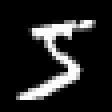

In [11]:
index = 1
img = X_train_raw[:,:, index]

Gray.(img')

In [13]:
# Now the training labe
y_train_raw[index]

5

Now a test image

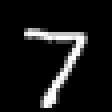

In [20]:
img1 = X_test_raw[:,:,index]
Gray.(img1')

In [24]:
y_test_raw[index]

7

Flatten input data

In [28]:
X_train = Flux.flatten(X_train_raw);
X_test = Flux.flatten(X_test_raw);

And hot one encode labels

In [37]:
y_train = onehotbatch(y_train_raw, 0:9)
y_test = onehotbatch(y_test_raw, 0:9)

10×10000 OneHotMatrix(::Vector{UInt32}) with eltype Bool:
 ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  1  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  1  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  …  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅     ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1
 1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  1  ⋅  ⋅  1     ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅

Define model architecture, this is going to be a Multilayer Perceptron (MLP)

In [39]:
model = Chain(
    Dense(28 * 28, 32, relu),
    Dense(32, 10),
    softmax
)

#Define loss function

loss(x, y) = crossentropy(model(x),y)

loss (generic function with 1 method)

In [41]:
ps = params(model);

With ADAM optimizer which stands for Adaptive Moment Estimation

In [43]:
learning_rate = 0.01;
opt = ADAM(learning_rate)

Adam(0.01, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}())

now we train the model

In [44]:
loss_history = []
epochs = 500

for epoch in 1:epochs
    #train model
    train!(loss, ps, [(X_train, y_train)], opt)
    # print report
    train_loss = loss(X_train, y_train)
    push!(loss_history,train_loss)
    print("Epochs = $epoch : Training Loss = $train_loss")
end


Epochs = 1 : Training Loss = 2.0194283Epochs = 2 : Training Loss = 1.6899878

Epochs = 3 : Training Loss = 1.3757617Epochs = 4 : Training Loss = 1.0993943

Epochs = 5 : Training Loss = 0.8979577Epochs = 6 : Training Loss = 0.7629168

Epochs = 7 : Training Loss = 0.6726554Epochs = 8 : Training Loss = 0.59897745

Epochs = 9 : Training Loss = 0.5443007Epochs = 10 : Training Loss = 0.51177144

Epochs = 11 : Training Loss = 0.48227835Epochs = 12 : Training Loss = 0.4550523

Epochs = 13 : Training Loss = 0.4334105Epochs = 14 : Training Loss = 0.41744682

Epochs = 15 : Training Loss = 0.40508553Epochs = 16 : Training Loss = 0.39192662

Epochs = 17 : Training Loss = 0.38073045Epochs = 18 : Training Loss = 0.37199703

Epochs = 19 : Training Loss = 0.36288837Epochs = 20 : Training Loss = 0.35401633

Epochs = 21 : Training Loss = 0.34585947Epochs = 22 : Training Loss = 0.33871967

Epochs = 23 : Training Loss = 0.33249295Epochs = 24 : Training Loss = 0.32538193

Epochs = 25 : Training Loss = 0.3184439Epochs = 26 : Training Loss = 0.313122

Epochs = 27 : Training Loss = 0.30836302Epochs = 28 : Training Loss = 0.30346406

Epochs = 29 : Training Loss = 0.29868054Epochs = 30 : Training Loss = 0.2940942

Epochs = 31 : Training Loss = 0.28981718Epochs = 32 : Training Loss = 0.28590637

Epochs = 33 : Training Loss = 0.28193715Epochs = 34 : Training Loss = 0.27802053

Epochs = 35 : Training Loss = 0.27455372Epochs = 36 : Training Loss = 0.2710271

Epochs = 37 : Training Loss = 0.26759073Epochs = 38 : Training Loss = 0.2645752

Epochs = 39 : Training Loss = 0.26156643Epochs = 40 : Training Loss = 0.25868678

Epochs = 41 : Training Loss = 0.25591877Epochs = 42 : Training Loss = 0.25319767

Epochs = 43 : Training Loss = 0.25063697Epochs = 44 : Training Loss = 0.24805072

Epochs = 45 : Training Loss = 0.24550833Epochs = 46 : Training Loss = 0.24310927

Epochs = 47 : Training Loss = 0.24071257Epochs = 48 : Training Loss = 0.23830329

Epochs = 49 : Training Loss = 0.23599453Epochs = 50 : Training Loss = 0.23380461

Epochs = 51 : Training Loss = 0.23168209Epochs = 52 : Training Loss = 0.22953975

Epochs = 53 : Training Loss = 0.22744276Epochs = 54 : Training Loss = 0.22550401

Epochs = 55 : Training Loss = 0.22359979Epochs = 56 : Training Loss = 0.2217148

Epochs = 57 : Training Loss = 0.21989752Epochs = 58 : Training Loss = 0.21814176

Epochs = 59 : Training Loss = 0.21642871Epochs = 60 : Training Loss = 0.21471927

Epochs = 61 : Training Loss = 0.21306722Epochs = 62 : Training Loss = 0.21147646

Epochs = 63 : Training Loss = 0.20989984Epochs = 64 : Training Loss = 0.20834671

Epochs = 65 : Training Loss = 0.20683196Epochs = 66 : Training Loss = 0.20534994

Epochs = 67 : Training Loss = 0.20388483Epochs = 68 : Training Loss = 0.20243491

Epochs = 69 : Training Loss = 0.20101221Epochs = 70 : Training Loss = 0.19961703

Epochs = 71 : Training Loss = 0.19824232Epochs = 72 : Training Loss = 0.19688825

Epochs = 73 : Training Loss = 0.19555694Epochs = 74 : Training Loss = 0.19424878

Epochs = 75 : Training Loss = 0.19296241Epochs = 76 : Training Loss = 0.19169089

Epochs = 77 : Training Loss = 0.19043487Epochs = 78 : Training Loss = 0.18919396

Epochs = 79 : Training Loss = 0.18797533Epochs = 80 : Training Loss = 0.18677324

Epochs = 81 : Training Loss = 0.18558645Epochs = 82 : Training Loss = 0.18442139

Epochs = 83 : Training Loss = 0.18327121Epochs = 84 : Training Loss = 0.18214373

Epochs = 85 : Training Loss = 0.1810338Epochs = 86 : Training Loss = 0.17994219

Epochs = 87 : Training Loss = 0.1788671Epochs = 88 : Training Loss = 0.17780761

Epochs = 89 : Training Loss = 0.17676297Epochs = 90 : Training Loss = 0.17572936

Epochs = 91 : Training Loss = 0.1747055Epochs = 92 : Training Loss = 0.17369092

Epochs = 93 : Training Loss = 0.17268841Epochs = 94 : Training Loss = 0.17169936

Epochs = 95 : Training Loss = 0.17072332Epochs = 96 : Training Loss = 0.16976108

Epochs = 97 : Training Loss = 0.16881095Epochs = 98 : Training Loss = 0.16787405

Epochs = 99 : Training Loss = 0.16694818Epochs = 100 : Training Loss = 0.16603483

Epochs = 101 : Training Loss = 0.16513498Epochs = 102 : Training Loss = 0.16424668

Epochs = 103 : Training Loss = 0.1633685Epochs = 104 : Training Loss = 0.16250135

Epochs = 105 : Training Loss = 0.16164705Epochs = 106 : Training Loss = 0.16080453

Epochs = 107 : Training Loss = 0.15997408Epochs = 108 : Training Loss = 0.1591535

Epochs = 109 : Training Loss = 0.158346Epochs = 110 : Training Loss = 0.15754865

Epochs = 111 : Training Loss = 0.1567605Epochs = 112 : Training Loss = 0.15598226

Epochs = 113 : Training Loss = 0.15521331Epochs = 114 : Training Loss = 0.15445368

Epochs = 115 : Training Loss = 0.15370333Epochs = 116 : Training Loss = 0.15296131

Epochs = 117 : Training Loss = 0.15222579Epochs = 118 : Training Loss = 0.15149699

Epochs = 119 : Training Loss = 0.15077338Epochs = 120 : Training Loss = 0.15005916

Epochs = 121 : Training Loss = 0.14935122Epochs = 122 : Training Loss = 0.14864993

Epochs = 123 : Training Loss = 0.14795482Epochs = 124 : Training Loss = 0.14726679

Epochs = 125 : Training Loss = 0.14658707Epochs = 126 : Training Loss = 0.14591192

Epochs = 127 : Training Loss = 0.1452415Epochs = 128 : Training Loss = 0.14457567

Epochs = 129 : Training Loss = 0.14391437Epochs = 130 : Training Loss = 0.14326037

Epochs = 131 : Training Loss = 0.14261234Epochs = 132 : Training Loss = 0.14197028

Epochs = 133 : Training Loss = 0.14133376Epochs = 134 : Training Loss = 0.14070244

Epochs = 135 : Training Loss = 0.14007565Epochs = 136 : Training Loss = 0.13945244

Epochs = 137 : Training Loss = 0.13883351Epochs = 138 : Training Loss = 0.13821898

Epochs = 139 : Training Loss = 0.13760966Epochs = 140 : Training Loss = 0.13700464

Epochs = 141 : Training Loss = 0.13640374Epochs = 142 : Training Loss = 0.13580796

Epochs = 143 : Training Loss = 0.13521664Epochs = 144 : Training Loss = 0.13462883

Epochs = 145 : Training Loss = 0.13404402Epochs = 146 : Training Loss = 0.13346234

Epochs = 147 : Training Loss = 0.1328831Epochs = 148 : Training Loss = 0.13230686

Epochs = 149 : Training Loss = 0.1317339Epochs = 150 : Training Loss = 0.13116294

Epochs = 151 : Training Loss = 0.13059686Epochs = 152 : Training Loss = 0.13003351

Epochs = 153 : Training Loss = 0.12947239Epochs = 154 : Training Loss = 0.12891428

Epochs = 155 : Training Loss = 0.1283583Epochs = 156 : Training Loss = 0.1278061

Epochs = 157 : Training Loss = 0.12725449Epochs = 158 : Training Loss = 0.1267007

Epochs = 159 : Training Loss = 0.1261459Epochs = 160 : Training Loss = 0.12559451

Epochs = 161 : Training Loss = 0.12504435Epochs = 162 : Training Loss = 0.124498695

Epochs = 163 : Training Loss = 0.12395651Epochs = 164 : Training Loss = 0.123415545

Epochs = 165 : Training Loss = 0.12287502Epochs = 166 : Training Loss = 0.12233626

Epochs = 167 : Training Loss = 0.12179974Epochs = 168 : Training Loss = 0.12126428

Epochs = 169 : Training Loss = 0.12073075Epochs = 170 : Training Loss = 0.120199725

Epochs = 171 : Training Loss = 0.11966701Epochs = 172 : Training Loss = 0.119135275

Epochs = 173 : Training Loss = 0.11860553Epochs = 174 : Training Loss = 0.11807788

Epochs = 175 : Training Loss = 0.11754797Epochs = 176 : Training Loss = 0.11702018

Epochs = 177 : Training Loss = 0.116498284Epochs = 178 : Training Loss = 0.115974896

Epochs = 179 : Training Loss = 0.11545244Epochs = 180 : Training Loss = 0.11493252

Epochs = 181 : Training Loss = 0.11441598Epochs = 182 : Training Loss = 0.11390291

Epochs = 183 : Training Loss = 0.11339097Epochs = 184 : Training Loss = 0.112880014

Epochs = 185 : Training Loss = 0.11237098Epochs = 186 : Training Loss = 0.11186405

Epochs = 187 : Training Loss = 0.111360736Epochs = 188 : Training Loss = 0.11085877

Epochs = 189 : Training Loss = 0.11035814Epochs = 190 : Training Loss = 0.10985982

Epochs = 191 : Training Loss = 0.10936258Epochs = 192 : Training Loss = 0.10886807

Epochs = 193 : Training Loss = 0.10837562Epochs = 194 : Training Loss = 0.10788667

Epochs = 195 : Training Loss = 0.10740078Epochs = 196 : Training Loss = 0.10691968

Epochs = 197 : Training Loss = 0.106440514Epochs = 198 : Training Loss = 0.10596525

Epochs = 199 : Training Loss = 0.10549107Epochs = 200 : Training Loss = 0.105025195

Epochs = 201 : Training Loss = 0.10456281Epochs = 202 : Training Loss = 0.104103744

Epochs = 203 : Training Loss = 0.10364755Epochs = 204 : Training Loss = 0.10319485

Epochs = 205 : Training Loss = 0.10274715Epochs = 206 : Training Loss = 0.10230142

Epochs = 207 : Training Loss = 0.10185794Epochs = 208 : Training Loss = 0.101417534

Epochs = 209 : Training Loss = 0.100979Epochs = 210 : Training Loss = 0.10054359

Epochs = 211 : Training Loss = 0.100111835Epochs = 212 : Training Loss = 0.09968349

Epochs = 213 : Training Loss = 0.09925758Epochs = 214 : Training Loss = 0.09883609

Epochs = 215 : Training Loss = 0.098415695Epochs = 216 : Training Loss = 0.09799784

Epochs = 217 : Training Loss = 0.0975843Epochs = 218 : Training Loss = 0.09717342

Epochs = 219 : Training Loss = 0.0967641Epochs = 220 : Training Loss = 0.09635688

Epochs = 221 : Training Loss = 0.095953904Epochs = 222 : Training Loss = 0.09555427

Epochs = 223 : Training Loss = 0.0951547Epochs = 224 : Training Loss = 0.09475913

Epochs = 225 : Training Loss = 0.094364494Epochs = 226 : Training Loss = 0.093972765

Epochs = 227 : Training Loss = 0.09358418Epochs = 228 : Training Loss = 0.09320081

Epochs = 229 : Training Loss = 0.09281966Epochs = 230 : Training Loss = 0.092441484

Epochs = 231 : Training Loss = 0.0920658Epochs = 232 : Training Loss = 0.09169385

Epochs = 233 : Training Loss = 0.09132537Epochs = 234 : Training Loss = 0.09095969

Epochs = 235 : Training Loss = 0.09059416Epochs = 236 : Training Loss = 0.09022992

Epochs = 237 : Training Loss = 0.08986822Epochs = 238 : Training Loss = 0.08950929

Epochs = 239 : Training Loss = 0.08915296Epochs = 240 : Training Loss = 0.08879943

Epochs = 241 : Training Loss = 0.08844823Epochs = 242 : Training Loss = 0.088098034

Epochs = 243 : Training Loss = 0.087749936Epochs = 244 : Training Loss = 0.0874048

Epochs = 245 : Training Loss = 0.08706148Epochs = 246 : Training Loss = 0.086720124

Epochs = 247 : Training Loss = 0.08638041Epochs = 248 : Training Loss = 0.08604314

Epochs = 249 : Training Loss = 0.08570724Epochs = 250 : Training Loss = 0.08537386

Epochs = 251 : Training Loss = 0.08504179Epochs = 252 : Training Loss = 0.08471245

Epochs = 253 : Training Loss = 0.08438571Epochs = 254 : Training Loss = 0.084059946

Epochs = 255 : Training Loss = 0.08373112Epochs = 256 : Training Loss = 0.08340715

Epochs = 257 : Training Loss = 0.08308589Epochs = 258 : Training Loss = 0.08276272

Epochs = 259 : Training Loss = 0.082442336Epochs = 260 : Training Loss = 0.08212465

Epochs = 261 : Training Loss = 0.08180636Epochs = 262 : Training Loss = 0.08149326

Epochs = 263 : Training Loss = 0.08117621Epochs = 264 : Training Loss = 0.08086198

Epochs = 265 : Training Loss = 0.08055418Epochs = 266 : Training Loss = 0.0802495

Epochs = 267 : Training Loss = 0.079943165Epochs = 268 : Training Loss = 0.07963589

Epochs = 269 : Training Loss = 0.079331584Epochs = 270 : Training Loss = 0.07903024

Epochs = 271 : Training Loss = 0.0787381Epochs = 272 : Training Loss = 0.078434475

Epochs = 273 : Training Loss = 0.07812951Epochs = 274 : Training Loss = 0.077834785

Epochs = 275 : Training Loss = 0.07754132Epochs = 276 : Training Loss = 0.077250585

Epochs = 277 : Training Loss = 0.07696128Epochs = 278 : Training Loss = 0.07666891

Epochs = 279 : Training Loss = 0.076378964Epochs = 280 : Training Loss = 0.07608691

Epochs = 281 : Training Loss = 0.075799115Epochs = 282 : Training Loss = 0.07551387

Epochs = 283 : Training Loss = 0.0752333Epochs = 284 : Training Loss = 0.074956186

Epochs = 285 : Training Loss = 0.074684754Epochs = 286 : Training Loss = 0.07441668

Epochs = 287 : Training Loss = 0.07413496Epochs = 288 : Training Loss = 0.073849015

Epochs = 289 : Training Loss = 0.073560186Epochs = 290 : Training Loss = 0.073283106

Epochs = 291 : Training Loss = 0.07302354Epochs = 292 : Training Loss = 0.072755694

Epochs = 293 : Training Loss = 0.07247996Epochs = 294 : Training Loss = 0.07220332

Epochs = 295 : Training Loss = 0.07192985Epochs = 296 : Training Loss = 0.0716654

Epochs = 297 : Training Loss = 0.07140661Epochs = 298 : Training Loss = 0.07113799

Epochs = 299 : Training Loss = 0.07087039Epochs = 300 : Training Loss = 0.07060718

Epochs = 301 : Training Loss = 0.07034489Epochs = 302 : Training Loss = 0.070084356

Epochs = 303 : Training Loss = 0.06982624Epochs = 304 : Training Loss = 0.06957312

Epochs = 305 : Training Loss = 0.06933805Epochs = 306 : Training Loss = 0.06912674

Epochs = 307 : Training Loss = 0.068921834Epochs = 308 : Training Loss = 0.06867817

Epochs = 309 : Training Loss = 0.06837842Epochs = 310 : Training Loss = 0.06806741

Epochs = 311 : Training Loss = 0.0677978Epochs = 312 : Training Loss = 0.06757079

Epochs = 313 : Training Loss = 0.06736057Epochs = 314 : Training Loss = 0.06713283

Epochs = 315 : Training Loss = 0.06685728Epochs = 316 : Training Loss = 0.06657495

Epochs = 317 : Training Loss = 0.06632906Epochs = 318 : Training Loss = 0.066113956

Epochs = 319 : Training Loss = 0.06589758Epochs = 320 : Training Loss = 0.06565299

Epochs = 321 : Training Loss = 0.0653923Epochs = 322 : Training Loss = 0.06513378

Epochs = 323 : Training Loss = 0.06489792Epochs = 324 : Training Loss = 0.064679466

Epochs = 325 : Training Loss = 0.06446175Epochs = 326 : Training Loss = 0.06423882

Epochs = 327 : Training Loss = 0.064001694Epochs = 328 : Training Loss = 0.06376098

Epochs = 329 : Training Loss = 0.063513234Epochs = 330 : Training Loss = 0.06327752

Epochs = 331 : Training Loss = 0.06305466Epochs = 332 : Training Loss = 0.06283867

Epochs = 333 : Training Loss = 0.062623456Epochs = 334 : Training Loss = 0.062414564

Epochs = 335 : Training Loss = 0.062196866Epochs = 336 : Training Loss = 0.061986223

Epochs = 337 : Training Loss = 0.061753362Epochs = 338 : Training Loss = 0.0615203

Epochs = 339 : Training Loss = 0.06127971Epochs = 340 : Training Loss = 0.06103948

Epochs = 341 : Training Loss = 0.06081294Epochs = 342 : Training Loss = 0.060599845

Epochs = 343 : Training Loss = 0.06039553Epochs = 344 : Training Loss = 0.06019703

Epochs = 345 : Training Loss = 0.060010303Epochs = 346 : Training Loss = 0.05981683

Epochs = 347 : Training Loss = 0.059614483Epochs = 348 : Training Loss = 0.059383813

Epochs = 349 : Training Loss = 0.059147295Epochs = 350 : Training Loss = 0.058905546

Epochs = 351 : Training Loss = 0.05867521Epochs = 352 : Training Loss = 0.058469765

Epochs = 353 : Training Loss = 0.05828082Epochs = 354 : Training Loss = 0.0581076

Epochs = 355 : Training Loss = 0.05791282Epochs = 356 : Training Loss = 0.05770156

Epochs = 357 : Training Loss = 0.057473414Epochs = 358 : Training Loss = 0.057249416

Epochs = 359 : Training Loss = 0.0570243Epochs = 360 : Training Loss = 0.056814738

Epochs = 361 : Training Loss = 0.056619726Epochs = 362 : Training Loss = 0.056434065

Epochs = 363 : Training Loss = 0.056256592Epochs = 364 : Training Loss = 0.056070767

Epochs = 365 : Training Loss = 0.05590597Epochs = 366 : Training Loss = 0.055720277

Epochs = 367 : Training Loss = 0.055536304Epochs = 368 : Training Loss = 0.055313714

Epochs = 369 : Training Loss = 0.05509114Epochs = 370 : Training Loss = 0.054855004

Epochs = 371 : Training Loss = 0.054633804Epochs = 372 : Training Loss = 0.0544353

Epochs = 373 : Training Loss = 0.054258198Epochs = 374 : Training Loss = 0.054098543

Epochs = 375 : Training Loss = 0.05393244Epochs = 376 : Training Loss = 0.053764533

Epochs = 377 : Training Loss = 0.05357982Epochs = 378 : Training Loss = 0.053392965

Epochs = 379 : Training Loss = 0.053179163Epochs = 380 : Training Loss = 0.05295402

Epochs = 381 : Training Loss = 0.05271985Epochs = 382 : Training Loss = 0.052513726

Epochs = 383 : Training Loss = 0.052333813Epochs = 384 : Training Loss = 0.052166067

Epochs = 385 : Training Loss = 0.05200466Epochs = 386 : Training Loss = 0.0518395

Epochs = 387 : Training Loss = 0.0516682Epochs = 388 : Training Loss = 0.051478125

Epochs = 389 : Training Loss = 0.051275138Epochs = 390 : Training Loss = 0.0510671

Epochs = 391 : Training Loss = 0.050874967Epochs = 392 : Training Loss = 0.050672412

Epochs = 393 : Training Loss = 0.05047762Epochs = 394 : Training Loss = 0.050297298

Epochs = 395 : Training Loss = 0.050129615Epochs = 396 : Training Loss = 0.049974613

Epochs = 397 : Training Loss = 0.049832527Epochs = 398 : Training Loss = 0.049727406

Epochs = 399 : Training Loss = 0.049620565Epochs = 400 : Training Loss = 0.049516488

Epochs = 401 : Training Loss = 0.049321953Epochs = 402 : Training Loss = 0.049089503

Epochs = 403 : Training Loss = 0.04881312Epochs = 404 : Training Loss = 0.04856211

Epochs = 405 : Training Loss = 0.048374414Epochs = 406 : Training Loss = 0.048247777

Epochs = 407 : Training Loss = 0.04812905Epochs = 408 : Training Loss = 0.04797497

Epochs = 409 : Training Loss = 0.04780248Epochs = 410 : Training Loss = 0.047599174

Epochs = 411 : Training Loss = 0.047378287Epochs = 412 : Training Loss = 0.047191057

Epochs = 413 : Training Loss = 0.047032885Epochs = 414 : Training Loss = 0.046910856

Epochs = 415 : Training Loss = 0.0468122Epochs = 416 : Training Loss = 0.046698067

Epochs = 417 : Training Loss = 0.046556544Epochs = 418 : Training Loss = 0.046369955

Epochs = 419 : Training Loss = 0.046142723Epochs = 420 : Training Loss = 0.045921072

Epochs = 421 : Training Loss = 0.045723412Epochs = 422 : Training Loss = 0.045581177

Epochs = 423 : Training Loss = 0.045466844Epochs = 424 : Training Loss = 0.045347054

Epochs = 425 : Training Loss = 0.045208607Epochs = 426 : Training Loss = 0.045041315

Epochs = 427 : Training Loss = 0.04486681Epochs = 428 : Training Loss = 0.044670206

Epochs = 429 : Training Loss = 0.04447821Epochs = 430 : Training Loss = 0.04430935

Epochs = 431 : Training Loss = 0.0441603Epochs = 432 : Training Loss = 0.04402515

Epochs = 433 : Training Loss = 0.043901276Epochs = 434 : Training Loss = 0.043796483

Epochs = 435 : Training Loss = 0.043697443Epochs = 436 : Training Loss = 0.04358166

Epochs = 437 : Training Loss = 0.043430325Epochs = 438 : Training Loss = 0.04324816

Epochs = 439 : Training Loss = 0.043050684Epochs = 440 : Training Loss = 0.04283313

Epochs = 441 : Training Loss = 0.04264742Epochs = 442 : Training Loss = 0.042495813

Epochs = 443 : Training Loss = 0.042385653Epochs = 444 : Training Loss = 0.042300202

Epochs = 445 : Training Loss = 0.04220577Epochs = 446 : Training Loss = 0.04208871

Epochs = 447 : Training Loss = 0.041942842Epochs = 448 : Training Loss = 0.04177415

Epochs = 449 : Training Loss = 0.04157704Epochs = 450 : Training Loss = 0.041377474

Epochs = 451 : Training Loss = 0.0411971Epochs = 452 : Training Loss = 0.0410448

Epochs = 453 : Training Loss = 0.040911686Epochs = 454 : Training Loss = 0.040788095

Epochs = 455 : Training Loss = 0.0406604Epochs = 456 : Training Loss = 0.040538467

Epochs = 457 : Training Loss = 0.040437218Epochs = 458 : Training Loss = 0.040340006

Epochs = 459 : Training Loss = 0.040252842Epochs = 460 : Training Loss = 0.040116813

Epochs = 461 : Training Loss = 0.03997442Epochs = 462 : Training Loss = 0.039832875

Epochs = 463 : Training Loss = 0.03966515Epochs = 464 : Training Loss = 0.039487183

Epochs = 465 : Training Loss = 0.03929975Epochs = 466 : Training Loss = 0.039136752

Epochs = 467 : Training Loss = 0.038984824Epochs = 468 : Training Loss = 0.038851626

Epochs = 469 : Training Loss = 0.038721364Epochs = 470 : Training Loss = 0.03860773

Epochs = 471 : Training Loss = 0.038506918Epochs = 472 : Training Loss = 0.0384202

Epochs = 473 : Training Loss = 0.03833016Epochs = 474 : Training Loss = 0.038238972

Epochs = 475 : Training Loss = 0.038157776Epochs = 476 : Training Loss = 0.03804298

Epochs = 477 : Training Loss = 0.037875522Epochs = 478 : Training Loss = 0.037689332

Epochs = 479 : Training Loss = 0.037492007Epochs = 480 : Training Loss = 0.037319012

Epochs = 481 : Training Loss = 0.03715296Epochs = 482 : Training Loss = 0.037019733

Epochs = 483 : Training Loss = 0.03693016Epochs = 484 : Training Loss = 0.036862668

Epochs = 485 : Training Loss = 0.036808483Epochs = 486 : Training Loss = 0.036734156

Epochs = 487 : Training Loss = 0.036649212Epochs = 488 : Training Loss = 0.036514007

Epochs = 489 : Training Loss = 0.036321748Epochs = 490 : Training Loss = 0.03612377

Epochs = 491 : Training Loss = 0.035922334Epochs = 492 : Training Loss = 0.03576285

Epochs = 493 : Training Loss = 0.035640378Epochs = 494 : Training Loss = 0.035536766

Epochs = 495 : Training Loss = 0.035457686Epochs = 496 : Training Loss = 0.0353723

Epochs = 497 : Training Loss = 0.035281446Epochs = 498 : Training Loss = 0.035196595

Epochs = 499 : Training Loss = 0.03510415Epochs = 500 : Training Loss = 0.03498373

Once trained, let;s make predictions

In [91]:
y_hat_raw = model(X_test)

y_hat = onecold(y_hat_raw) .- 1

y = y_test_raw

mean(y_hat .== y)

0.958

In [92]:
using JLD2

@save "MNIST_model.jld2" model 

In [93]:
check = [y_hat[i] == y[i] for i in 1:length(y)]

index = collect(1:length(y))

check_display = [index y_hat y check]

vscodedisplay(check_display)

In [94]:
# view misclassifications

misclass_index = 9

img = X_test_raw[:, :, misclass_index]

colorview(Gray, img')

y[misclass_index]

y_hat[misclass_index]

4

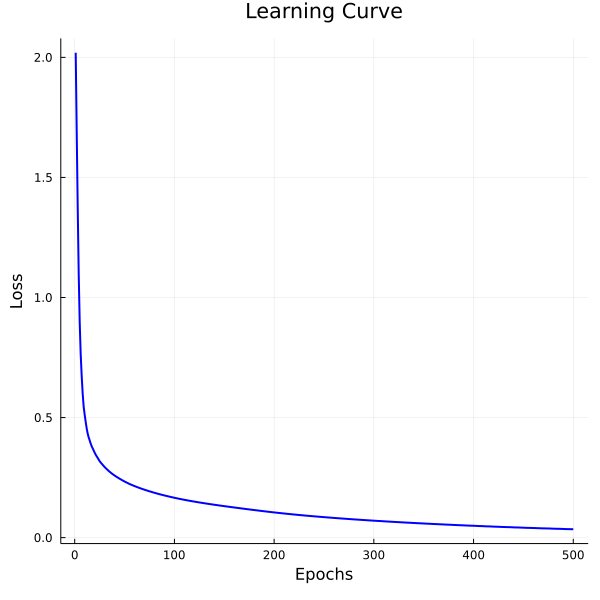

In [95]:
# initialize plot

gr(size = (600, 600))

# plot learning curve

p_l_curve = plot(1:epochs, loss_history,
    xlabel = "Epochs",
    ylabel = "Loss",
    title = "Learning Curve",
    legend = false,
    color = :blue,
    linewidth = 2
)